In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
%matplotlib inline

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.apply(lambda x: sum(x.isnull()),axis=0)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
data.columns = data.columns.str.strip()

In [7]:
X = data.drop(['loan_status', 'loan_id'], axis=1) 

In [8]:
y = data['loan_status']

In [9]:
print("Target variable distribution:")

Target variable distribution:


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt


In [11]:
print(y.value_counts(normalize=True))

 Approved    0.62216
 Rejected    0.37784
Name: loan_status, dtype: float64


In [12]:
categorical_features = ['education', 'self_employed']
numeric_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Apply the preprocessing pipeline to the data
X_processed = preprocessor.fit_transform(X)

# Save the preprocessor
joblib.dump(preprocessor, 'models/preprocessor.pkl')


['models/preprocessor.pkl']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}


In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f'models/{name}_model.pkl')
    print(f'{name} trained and saved.')


Logistic Regression trained and saved.
Random Forest trained and saved.
Decision Tree trained and saved.
SVM trained and saved.


In [16]:
# Initialize variables to track best model
best_model_name = None
best_accuracy = 0.0

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Print the best model based on highest accuracy
print(f'Best Model: {best_model_name} with Accuracy: {best_accuracy}')


Logistic Regression Accuracy: 0.905152224824356
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Approved       0.92      0.93      0.92       536
    Rejected       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Random Forest Accuracy: 0.9789227166276346
Random Forest Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Decision Tree Accuracy: 0.9695550351288056
Decision Tree Classification Report:
              precision    recall  f1-score   support

    Approved       0.97      0.98      0

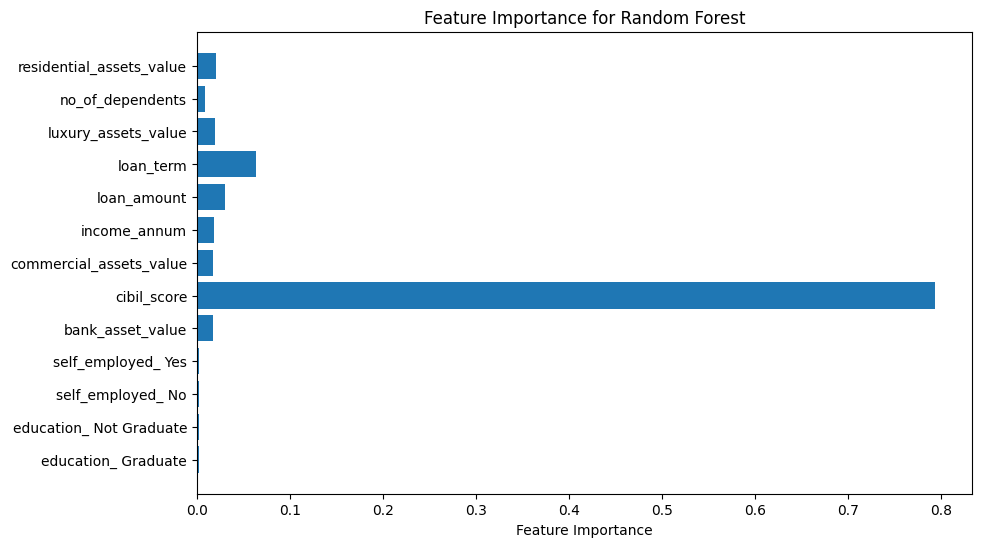

In [17]:
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist() + numeric_features.tolist()
    feature_importances = rf_model.feature_importances_

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Random Forest')
    plt.show()


In [18]:
def test_model(input_data):
    # Load model and preprocessor
    model = joblib.load(f'models/{best_model_name}_model.pkl')
    preprocessor = joblib.load('models/preprocessor.pkl')

    # Create DataFrame
    input_df = pd.DataFrame(input_data)

    # Preprocess the data
    input_processed = preprocessor.transform(input_df)

    # Predict using the model
    prediction = model.predict(input_processed)[0]
    prediction_result = 'Approved' if prediction == 1 else 'Not Approved'
    return prediction_result

# Test input data
test_data = {
    'no_of_dependents': [1],
    'education': ['Graduate'],
    'self_employed': ['No'],
    'income_annum': [8300000],
    'loan_amount': [31800000],
    'loan_term': [16],
    'cibil_score': [818],
    'residential_assets_value': [23400000],
    'commercial_assets_value': [7400000],
    'luxury_assets_value': [32200000],
    'bank_asset_value': [8500000]
}

print("Prediction result:", test_model(test_data))


Prediction result: Not Approved


In [19]:
# Test input data for Approved prediction
test_data_approved = {
    'no_of_dependents': [1],
    'education': ['Graduate'],
    'self_employed': ['No'],
    'income_annum': [8300000],
    'loan_amount': [31800000],
    'loan_term': [16],
    'cibil_score': [818],
    'residential_assets_value': [23400000],
    'commercial_assets_value': [7400000],
    'luxury_assets_value': [32200000],
    'bank_asset_value': [8500000]
}

print("Prediction result for approved example:", test_model(test_data_approved))


Prediction result for approved example: Not Approved


In [20]:
def test_model(input_data):
    # Load model and preprocessor
    model = joblib.load(f'models/{best_model_name}_model.pkl')
    preprocessor = joblib.load('models/preprocessor.pkl')

    # Create DataFrame
    input_df = pd.DataFrame(input_data)

    # Preprocess the data
    input_processed = preprocessor.transform(input_df)

    # Predict using the model
    prediction = model.predict(input_processed)[0]
    prediction_result = 'Approved' if prediction == 1 else 'Not Approved'
    return prediction_result

# Test input data for Approved prediction
test_data_approved = {
    'no_of_dependents': [0],
    'education': ['Graduate'],
    'self_employed': ['No'],
    'income_annum': [12000000],
    'loan_amount': [5000000],
    'loan_term': [12],
    'cibil_score': [850],
    'residential_assets_value': [50000000],
    'commercial_assets_value': [20000000],
    'luxury_assets_value': [10000000],
    'bank_asset_value': [20000000]
}

print("Prediction result for approved example:", test_model(test_data_approved))

# Test input data for Not Approved prediction
test_data_not_approved = {
    'no_of_dependents': [5],
    'education': ['Not Graduate'],
    'self_employed': ['Yes'],
    'income_annum': [100000],
    'loan_amount': [5000000],
    'loan_term': [60],
    'cibil_score': [500],
    'residential_assets_value': [100000],
    'commercial_assets_value': [50000],
    'luxury_assets_value': [0],
    'bank_asset_value': [10000]
}

print("Prediction result for not approved example:", test_model(test_data_not_approved))


Prediction result for approved example: Not Approved
Prediction result for not approved example: Not Approved


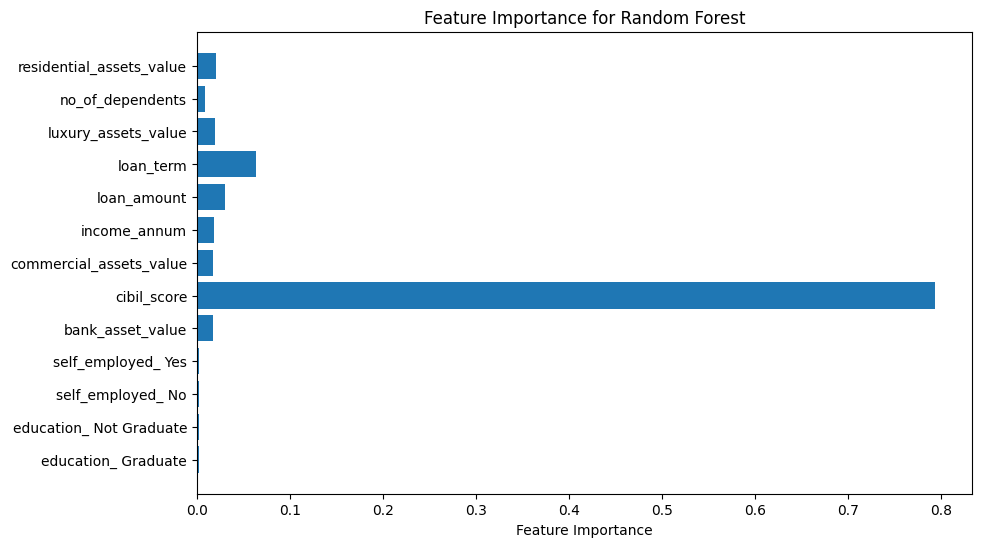

In [21]:
if 'Random Forest' in models:
    rf_model = joblib.load('models/Random Forest_model.pkl')
    feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist() + numeric_features.tolist()
    feature_importances = rf_model.feature_importances_

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Random Forest')
    plt.show()


In [22]:
def test_model(input_data):
    # Load model and preprocessor
    model = joblib.load(f'models/{best_model_name}_model.pkl')
    preprocessor = joblib.load('models/preprocessor.pkl')

    # Create DataFrame
    input_df = pd.DataFrame(input_data)

    # Preprocess the data
    input_processed = preprocessor.transform(input_df)

    # Predict using the model
    prediction = model.predict(input_processed)[0]
    prediction_result = 'Approved' if prediction == 1 else 'Not Approved'
    return prediction_result

# Test input data for Approved prediction
test_data_approved = {
    'no_of_dependents': [0],
    'education': ['Graduate'],
    'self_employed': ['No'],
    'income_annum': [20000000],
    'loan_amount': [1000000],
    'loan_term': [12],
    'cibil_score': [850],  # High cibil_score
    'residential_assets_value': [100000000],
    'commercial_assets_value': [50000000],
    'luxury_assets_value': [30000000],
    'bank_asset_value': [50000000]
}

print("Prediction result for approved example:", test_model(test_data_approved))

# Test input data for Not Approved prediction
test_data_not_approved = {
    'no_of_dependents': [5],
    'education': ['Not Graduate'],
    'self_employed': ['Yes'],
    'income_annum': [100000],
    'loan_amount': [5000000],
    'loan_term': [60],
    'cibil_score': [500],  # Low cibil_score
    'residential_assets_value': [100000],
    'commercial_assets_value': [50000],
    'luxury_assets_value': [0],
    'bank_asset_value': [10000]
}

print("Prediction result for not approved example:", test_model(test_data_not_approved))


Prediction result for approved example: Not Approved
Prediction result for not approved example: Not Approved


In [23]:
# Test input data for Approved prediction
test_data_approved = {
    'no_of_dependents': [0],
    'education': ['Graduate'],
    'self_employed': ['No'],
    'income_annum': [30000000],
    'loan_amount': [1000000],
    'loan_term': [12],
    'cibil_score': [900],  # Very high cibil_score
    'residential_assets_value': [100000000],
    'commercial_assets_value': [50000000],
    'luxury_assets_value': [30000000],
    'bank_asset_value': [50000000]
}

print("Prediction result for approved example:", test_model(test_data_approved))


Prediction result for approved example: Not Approved
